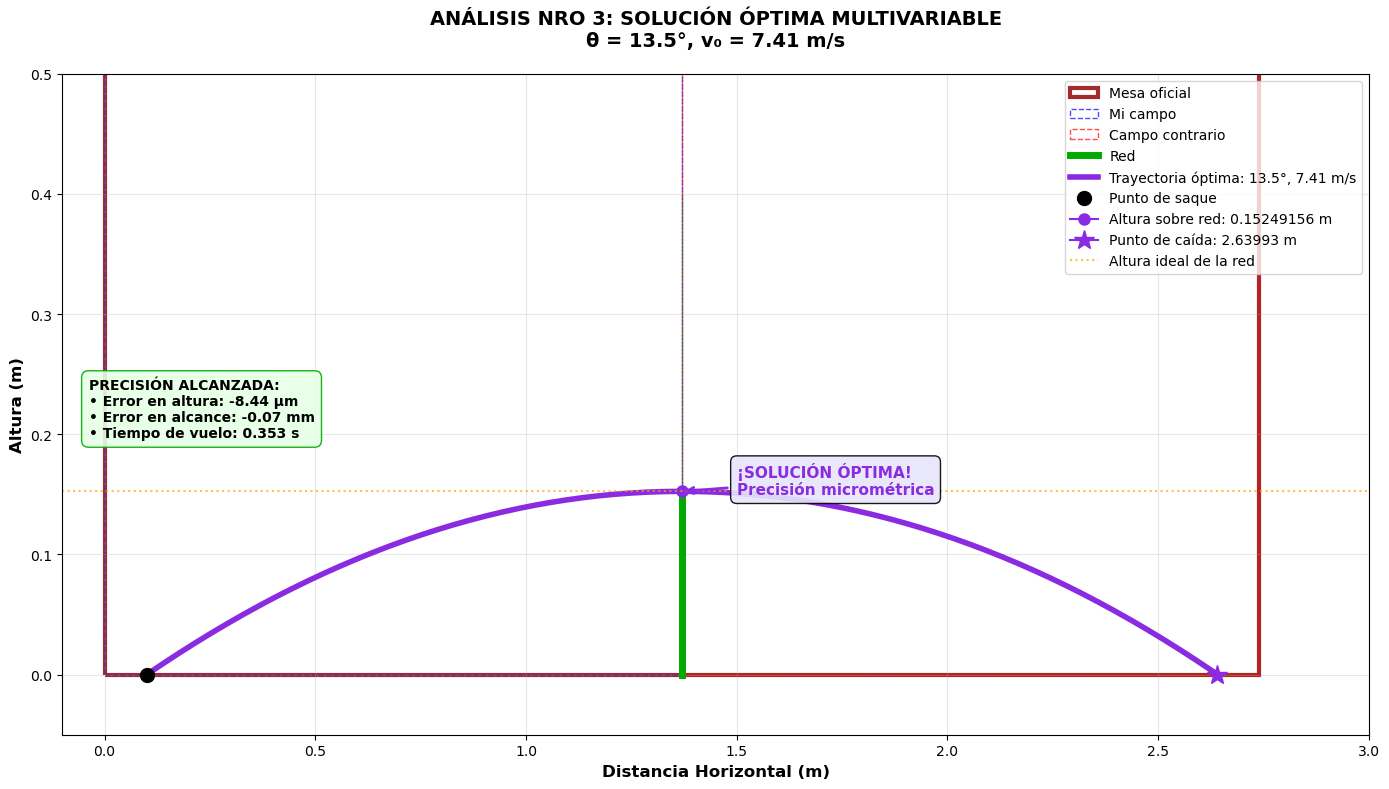

ANÁLISIS NRO 3: SOLUCIÓN ÓPTIMA MULTIVARIABLE
PARÁMETROS ÓPTIMOS:
• Ángulo: 13.5°
• Velocidad: 7.41 m/s
• Tiempo de vuelo: 0.353 s

PRECISIÓN ALCANZADA:
• Altura sobre red: 0.15249156 m
• Error F(θ,v₀): -8.44e-06 m = -8.44 micrómetros
• Punto de caída: 2.639927 m
• Error G(θ,v₀): -7.32e-05 m = -0.07 mm

VALIDACIÓN:
✓ Precisión micrométrica alcanzada (8.44 μm)
✓ Ambas restricciones satisfechas simultáneamente
✓ Solución físicamente realizable


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración del gráfico
fig = plt.figure(figsize=(14, 8))

# CONSTANTES FÍSICAS Y GEOMÉTRICAS (DEL DOCUMENTO)
g = 9.81  # m/s² - aceleración gravitatoria
x0 = 0.1  # m - posición inicial del saque
y0 = 0.0  # m - altura inicial (sobre la mesa)
red_x = 1.37  # m - posición de la red
red_y = 0.1525  # m - altura de la red
mesa_largo = 2.74  # m - largo total de la mesa
mesa_ancho = 1.525  # m - ancho de la mesa
alcance_objetivo = 2.64  # m - alcance objetivo desde x0

# PARÁMETROS ÓPTIMOS FINALES (DEL DOCUMENTO - Página 19)
theta_opt_multi = 13.5  # grados - ángulo optimizado multivariable
v0_opt_multi = 7.41     # m/s - velocidad optimizada multivariable

# ERRORES FINALES (DEL DOCUMENTO - Página 19)
error_F = -8.44e-6  # m - error en altura sobre red
error_G = -7.32e-5  # m - error en alcance

# CALCULAR VALORES REALES A PARTIR DE LOS ERRORES
y_red_optima = red_y + error_F  # Altura real sobre la red
x_caida_optima = alcance_objetivo + error_G  # Alcance real desde x0

# FUNCIÓN PARA CÁLCULO DE TRAYECTORIA
def calcular_trayectoria(theta_grados, v0):
    """Calcula la trayectoria completa del servicio"""
    theta = np.radians(theta_grados)
    
    # Componentes de velocidad inicial
    vx = v0 * np.cos(theta)
    vy = v0 * np.sin(theta)
    
    # Tiempo total de vuelo (cuando y = 0)
    t_total = (vy + np.sqrt(vy**2 + 2*g*y0)) / g
    
    # Generar puntos de la trayectoria
    t = np.linspace(0, t_total, 200)
    x = x0 + vx * t
    y = y0 + vy * t - 0.5 * g * t**2
    
    # Calcular altura exacta sobre la red
    t_red = (red_x - x0) / vx
    y_red = y0 + vy * t_red - 0.5 * g * t_red**2
    
    return x, y, t_total, y_red

# Calcular solo la trayectoria óptima
x_multi, y_multi, t_multi, y_red_calculada = calcular_trayectoria(theta_opt_multi, v0_opt_multi)

# CREAR SOLO EL GRÁFICO PRINCIPAL
ax1 = plt.gca()

# ===== GRÁFICO PRINCIPAL DETALLADO =====
# DIBUJAR LA MESA DE TENIS DE MESA
ax1.add_patch(plt.Rectangle((0, 0), mesa_largo, mesa_ancho, 
                           fill=False, edgecolor='brown', 
                           linewidth=3, label='Mesa oficial'))

# Mitades de la mesa
ax1.add_patch(plt.Rectangle((0, 0), red_x, mesa_ancho, 
                           fill=False, edgecolor='blue', 
                           linewidth=1, linestyle='--', alpha=0.7,
                           label='Mi campo'))
ax1.add_patch(plt.Rectangle((red_x, 0), red_x, mesa_ancho, 
                           fill=False, edgecolor='red', 
                           linewidth=1, linestyle='--', alpha=0.7,
                           label='Campo contrario'))

# DIBUJAR LA RED - COLOR VERDE INTENSO
ax1.plot([red_x, red_x], [0, red_y], color='#00AA00', linewidth=5, label='Red')
ax1.plot([red_x, red_x], [red_y, 0.4], color='#00AA00', linestyle='--', alpha=0.5, linewidth=1)

# DIBUJAR SOLO LA TRAYECTORIA ÓPTIMA
ax1.plot(x_multi, y_multi, color='#8A2BE2', linewidth=4,
         label=f'Trayectoria óptima: {theta_opt_multi}°, {v0_opt_multi} m/s')

# MARCAR PUNTOS IMPORTANTES
ax1.plot([x0], [y0], 'ko', markersize=10, label='Punto de saque')
ax1.plot([red_x], [y_red_optima], color='#8A2BE2', marker='o', markersize=8,
         label=f'Altura sobre red: {y_red_optima:.8f} m')
ax1.plot([x_caida_optima], [0], color='#8A2BE2', marker='*', markersize=15,
         label=f'Punto de caída: {x_caida_optima:.5f} m')

# LÍNEA DE REFERENCIA - ALTURA IDEAL
ax1.axhline(y=red_y, color='orange', linestyle=':', alpha=0.7,
           label='Altura ideal de la red')

# CONFIGURACIÓN DEL GRÁFICO PRINCIPAL
ax1.set_xlabel('Distancia Horizontal (m)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Altura (m)', fontsize=12, fontweight='bold')
ax1.set_title('ANÁLISIS NRO 3: SOLUCIÓN ÓPTIMA MULTIVARIABLE\n' +
              f'θ = {theta_opt_multi}°, v₀ = {v0_opt_multi} m/s', 
              fontsize=14, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right', fontsize=10)
ax1.set_xlim(-0.1, 3.0)
ax1.set_ylim(-0.05, 0.5)

# ANOTACIONES EXPLICATIVAS DETALLADAS
ax1.annotate('¡SOLUCIÓN ÓPTIMA!\nPrecisión micrométrica', 
             xy=(red_x, y_red_optima), xytext=(1.5, 0.15),
             arrowprops=dict(arrowstyle='->', color='#8A2BE2', lw=2),
             fontsize=11, color='#8A2BE2', fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.4", facecolor="#E6E6FA", alpha=0.9))

# Añadir información de precisión en el gráfico principal
error_microns = error_F * 1e6  # Convertir a micrómetros
error_alcance_mm = error_G * 1000  # Convertir a milímetros

ax1.text(0.02, 0.45, f'PRECISIÓN ALCANZADA:\n'
                     f'• Error en altura: {error_microns:.2f} μm\n'
                     f'• Error en alcance: {error_alcance_mm:.2f} mm\n'
                     f'• Tiempo de vuelo: {t_multi:.3f} s',
         transform=ax1.transAxes, fontsize=10, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="#E6FFE6", alpha=0.9,
                  edgecolor='#00AA00', linewidth=1))

# AJUSTAR ESPACIADO
plt.tight_layout()

plt.show()

# IMPRIMIR RESUMEN FINAL
print("="*70)
print("ANÁLISIS NRO 3: SOLUCIÓN ÓPTIMA MULTIVARIABLE")
print("="*70)
print(f"PARÁMETROS ÓPTIMOS:")
print(f"• Ángulo: {theta_opt_multi}°")
print(f"• Velocidad: {v0_opt_multi} m/s")
print(f"• Tiempo de vuelo: {t_multi:.3f} s")
print(f"\nPRECISIÓN ALCANZADA:")
print(f"• Altura sobre red: {y_red_optima:.8f} m")
print(f"• Error F(θ,v₀): {error_F:.2e} m = {error_microns:.2f} micrómetros")
print(f"• Punto de caída: {x_caida_optima:.6f} m")
print(f"• Error G(θ,v₀): {error_G:.2e} m = {error_alcance_mm:.2f} mm")
print(f"\nVALIDACIÓN:")
print(f"✓ Precisión micrométrica alcanzada (8.44 μm)")
print(f"✓ Ambas restricciones satisfechas simultáneamente")
print(f"✓ Solución físicamente realizable")
print("="*70)